In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from string import punctuation
from nltk.corpus import reuters, stopwords
import string

In [4]:
# Read your api key environment variable
from newsapi import NewsApiClient
#api_key = os.getenv("NEWS_API_KEY")

api_key = "6534e82cb8564f38aac15788ea645ef1"

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(q="bitcoin AND Bitcoin", language="en", page_size=50, sort_by="relevancy")
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_news_en['totalResults']}")
# Show sample article
bitcoin_news_en["articles"][5]

Total articles about Bitcoin: 3567


{'source': {'id': 'the-next-web', 'name': 'The Next Web'},
 'author': 'Satoshi Nakaboto',
 'title': 'Satoshi Nakaboto: ‘Visa approves launch of crypto debit card in Europe’',
 'description': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day. Welcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you what’s been going on with Bitcoin in the past 24 hours. As Locke used to say: Let’s add the milk of d…',
 'url': 'https://thenextweb.com/hardfork/2020/05/26/satoshi-nakaboto-visa-approves-launch-of-crypto-debit-card-in-europe/',
 'urlToImage': 'https://img-cdn.tnwcdn.com/image/hardfork?filter_last=1&fit=1280%2C640&url=https%3A%2F%2Fcdn0.tnwcdn.com%2Fwp-content%2Fblogs.dir%2F1%2Ffiles%2F2019%2F08%2Fbitcoin_today-header_bitcoin_today.jpg&signature=30221b6a68049cc6bc3b58f3ddb38864',
 'publishedAt': '2020-05-26T10:03:18Z',
 'content': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day.\r\nWelcome to another edition of Bi

In [7]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(q="ethereum AND Ethereum",language="en",page_size=50,sort_by="relevancy")
# Print total articles
print(f"Total articles about Etherum: {ethereum_news_en['totalResults']}")
# Show sample article
ethereum_news_en["articles"][5]

Total articles about Etherum: 964


{'source': {'id': None, 'name': 'Slashdot.org'},
 'author': 'EditorDavid',
 'title': "'FOSS Responders' Want to Help Open-Source Groups Survive",
 'description': '"Thanks to the coronavirus, technology events have been canceled left and right," writes ZDNet. "This, in turn, is damaging the finances of companies and groups that depend on these events."\n\nSome open-source groups, such as The Linux Foundation, can deal wit…',
 'url': 'https://news.slashdot.org/story/20/05/23/2351224/foss-responders-want-to-help-open-source-groups-survive',
 'urlToImage': 'https://a.fsdn.com/sd/topics/opensource_64.png',
 'publishedAt': '2020-05-24T18:34:00Z',
 'content': "Some open-source groups, such as The Linux Foundation, can deal with it. Others aren't so fortunate. Some, such as Drupal Foundation, the Open Source Initiative (OSI), Open Source Matters (Joomla), a… [+1202 chars]"}

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({"Text": text, "Date": date, "Compound": compound, "Positive": pos, "Negative": neg, "Neutral": neu, "Title Bitcoin": title})
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound","Negative","Neutral","Positive","Title Bitcoin","Text","Date"]
bitcoin_df = bitcoin_df[cols]
#bitcoin_df.sort_values(by='Negative',ascending=False,inplace=True)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Title Bitcoin,Text,Date
0,0.0000,0.000,1.000,0.000,"God Help Us, the Winklevoss Twins Are Co-Produ...",the winklevoss twinsthe brothers mark zuckerbe...,2020-06-09
1,-0.3464,0.134,0.819,0.046,How to Buy a Burner Phone,if youre planning to do some protesting and yo...,2020-06-04
2,-0.2755,0.070,0.930,0.000,Goldman Sachs lists 5 reasons why bitcoin is '...,reuters\r\n<ul><li>goldman sachs gave five rea...,2020-05-28
3,0.0000,0.000,1.000,0.000,'Get on the train': Famed investor Michael Nov...,<ul><li>famed investor michael novogratz tweet...,2020-06-02
4,0.5070,0.000,0.910,0.090,Satoshi Nakaboto: ‘Bitcoin continues downtrend...,our robot colleague satoshi nakaboto writes ab...,2020-05-25


In [9]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({"Text": text, "Title Ehterum": title, "Date": date, "Compound": compound, "Positive": pos,"Negative": neg, "Neutral": neu, "Title Ethereum": title})
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound","Negative","Neutral","Positive","Title Ethereum","Text","Date"]
ethereum_df = ethereum_df[cols]
#bitcoin_df.sort_values(by='Negative',ascending=False,inplace=True)

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Title Ethereum,Text,Date
0,0.000,0.0,1.00,0.00,Crypto Startup School: How to build projects a...,editor’s note:andreessen horowitzscrypto start...,2020-06-17
1,0.507,0.0,0.91,0.09,Satoshi Nakaboto: ‘Daily Ethereum network fees...,our robot colleague satoshi nakaboto writes ab...,2020-06-08
2,0.000,0.0,1.00,0.00,Crypto Startup School: How to scale companies ...,editors note:andreessen horowitzs crypto start...,2020-05-20
3,0.000,0.0,1.00,0.00,Decentralized identity management platform Mag...,for developers looking to quickly build identi...,2020-06-03
4,0.000,0.0,1.00,0.00,Rewarding civic pride and boosting the local e...,"akron, ohio, the hometown of lebron james and ...",2020-06-15


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,49.000000,49.000000,49.000000,49.000000
mean,0.194718,0.031898,0.898367,0.069796
std,0.389700,0.054795,0.064760,0.049596
min,-0.817600,0.000000,0.741000,0.000000
25%,0.000000,0.000000,0.879000,0.046000
50%,0.383200,0.000000,0.910000,0.090000
75%,0.507000,0.068000,0.922000,0.090000
max,0.817600,0.215000,1.000000,0.259000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,47.000000,47.000000,47.000000,47.000000
mean,0.153691,0.029298,0.905468,0.065191
std,0.403944,0.055441,0.074684,0.063580
min,-0.807400,0.000000,0.746000,0.000000
25%,0.000000,0.000000,0.855000,0.000000
50%,0.151100,0.000000,0.910000,0.065000
75%,0.507000,0.046500,1.000000,0.096500
max,0.760700,0.223000,1.000000,0.254000


### Questions:

Q: Which coin had the highest mean positive score?

A: BITCOIN has the higest mean positive score

Q: Which coin had the highest compound score?

A: BITCOIN has the higest compound score. 

Q. Which coin had the highest positive score?

A: BITCOIN has the higest positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
sw_addon = {',', 'how', 'what', 'https', 'damn','much','ha', 'btc' }

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    #convert to lower and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [15]:
# Create a new tokens column for bitcoin
bitcoin_tokens = bitcoin_df.copy()

tokenized = []
for i in bitcoin_tokens['Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})
    
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_text'] = tokens_df

tokenized = []
for i in bitcoin_tokens['Title Bitcoin']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens title':tokenized_articles})
    
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_title'] = tokens_df

bitcoin_tokens.head()

,Compound,Negative,Neutral,Positive,Title Bitcoin,Text,Date,tokens_text,tokens_title
0,0.0000,0.000,1.000,0.000,"God Help Us, the Winklevoss Twins Are Co-Produ...",the winklevoss twinsthe brothers mark zuckerbe...,2020-06-09,"[winklevoss, twinsthe, brother, mark, zuckerbe...","[god, help, us, winklevoss, twins, coproducing..."
1,-0.3464,0.134,0.819,0.046,How to Buy a Burner Phone,if youre planning to do some protesting and yo...,2020-06-04,"[youre, planning, protesting, dont, want, risk...","[buy, burner, phone]"
2,-0.2755,0.070,0.930,0.000,Goldman Sachs lists 5 reasons why bitcoin is '...,reuters\r\n<ul><li>goldman sachs gave five rea...,2020-05-28,"[reutersulligoldman, sachs, gave, five, reason...","[goldman, sachs, list, reason, bitcoin, asset,..."
3,0.0000,0.000,1.000,0.000,'Get on the train': Famed investor Michael Nov...,<ul><li>famed investor michael novogratz tweet...,2020-06-02,"[ullifamed, investor, michael, novogratz, twee...","[get, train, famed, investor, michael, novogra..."
4,0.5070,0.000,0.910,0.090,Satoshi Nakaboto: ‘Bitcoin continues downtrend...,our robot colleague satoshi nakaboto writes ab...,2020-05-25,"[robot, colleague, satoshi, nakaboto, writes, ...","[satoshi, nakaboto, bitcoin, continues, downtr..."


In [35]:
# Create a new tokens column for ethereum
ethereum_tokens = ethereum_df.copy()


tokenized_eth = []
for i in ethereum_tokens['Text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})
    
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_text'] = tokens_df_eth

tokenized_eth = []
for i in ethereum_tokens['Title Ethereum']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_title':tokenized_articles})

    
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_title'] = tokens_df_eth

ethereum_tokens.head()

,Compound,Negative,Neutral,Positive,Title Ethereum,Text,Date,tokens_text,tokens_title
0,0.000,0.0,1.00,0.00,Crypto Startup School: How to build projects a...,editor’s note:andreessen horowitzscrypto start...,2020-06-17,"[editor, noteandreessen, horowitzscrypto, star...","[crypto, startup, school, build, project, keep..."
1,0.507,0.0,0.91,0.09,Satoshi Nakaboto: ‘Daily Ethereum network fees...,our robot colleague satoshi nakaboto writes ab...,2020-06-08,"[robot, colleague, satoshi, nakaboto, writes, ...","[satoshi, nakaboto, daily, ethereum, network, ..."
2,0.000,0.0,1.00,0.00,Crypto Startup School: How to scale companies ...,editors note:andreessen horowitzs crypto start...,2020-05-20,"[editor, noteandreessen, horowitz, crypto, sta...","[crypto, startup, school, scale, company, usin..."
3,0.000,0.0,1.00,0.00,Decentralized identity management platform Mag...,for developers looking to quickly build identi...,2020-06-03,"[developer, looking, quickly, build, identity,...","[decentralized, identity, management, platform..."
4,0.000,0.0,1.00,0.00,Rewarding civic pride and boosting the local e...,"akron, ohio, the hometown of lebron james and ...",2020-06-15,"[akron, ohio, hometown, lebron, james, seat, u...","[rewarding, civic, pride, boosting, local, eco..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
from collections import Counter
from nltk import ngrams

In [54]:
all_bitcoin_words = []
for text in bitcoin_tokens['tokens_text']:
    for word in text:
        all_bitcoin_words.append(word)
        
        
all_eth_words = []
for text in ethereum_tokens['tokens_text']:
    for word in text:
        all_eth_words.append(word)

In [65]:
#bitcoin_sent = []
#for sent in bitcoin_tokens['text']:
   # sent_list = sent
   # bitcoin_sent.append(sent_list)
    
#eth_sent = []
#for sent in ethereum_tokens['text']:
   # sent_list_eth = sent 
   # eth_sent.append(sent_list_eth)

In [66]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [69]:
# Generate the Bitcoin N-grams where N=2

bigram_counter(bitcoin_sent)

,bigram,count


In [19]:
# Generate the Ethereum N-grams where N=2

bigram_counter(eth_sent)

[(('private', 'key'), 5),
 (('Ethereum', 'ETH'), 3),
 (('blockchain', 'bandit'), 2),
 (('last', 'year'), 2),
 (('weak', 'private'), 2),
 (('Elon', 'Musk'), 2),
 (('worth', 'Ethereum'), 2),
 (('JP', 'Morgan'), 2),
 (('President', 'Trump'), 1),
 (('Trump', 'tweeted'), 1),
 (('tweeted', 'insult'), 1),
 (('insult', 'Twitter'), 1),
 (('Twitter', 'morning'), 1),
 (('morning', 'time'), 1),
 (('time', 'Jack'), 1),
 (('Jack', 'took'), 1),
 (('took', 'conversation'), 1),
 (('conversation', 'platform'), 1),
 (('platform', 'White'), 1),
 (('White', 'House'), 1)]

In [70]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [71]:
# Get the top 10 words for Bitcoin
token_count(all_bitcoin_words)

[('bitcoin', 71),
 ('char', 49),
 ('satoshi', 42),
 ('nakaboto', 40),
 ('today', 21),
 ('going', 21),
 ('robot', 20),
 ('colleague', 20),
 ('writes', 20),
 ('every', 20)]

In [72]:
# Get the top 10 words for Ethereum
token_count(all_eth_words)

[('char', 47),
 ('bitcoin', 24),
 ('ethereum', 21),
 ('blockchain', 9),
 ('satoshi', 8),
 ('nakaboto', 8),
 ('crypto', 7),
 ('data', 7),
 ('cryptocurrency', 6),
 ('new', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

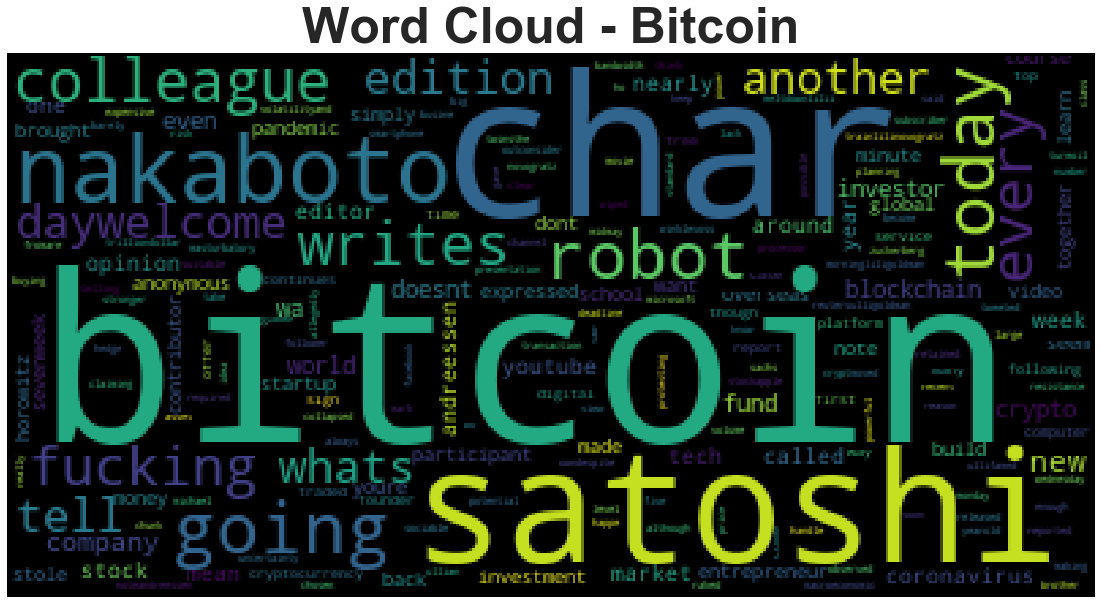

In [74]:
# Generate the Bitcoin word cloud
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

bitcoin_words = processed_text(all_bitcoin_words)
eth_words = processed_text(all_eth_words)


wc = WordCloud(collocations=False).generate(bitcoin_words)
fig = plt.figure()
plt.imshow(wc)
plt.title('Word Cloud - Bitcoin', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

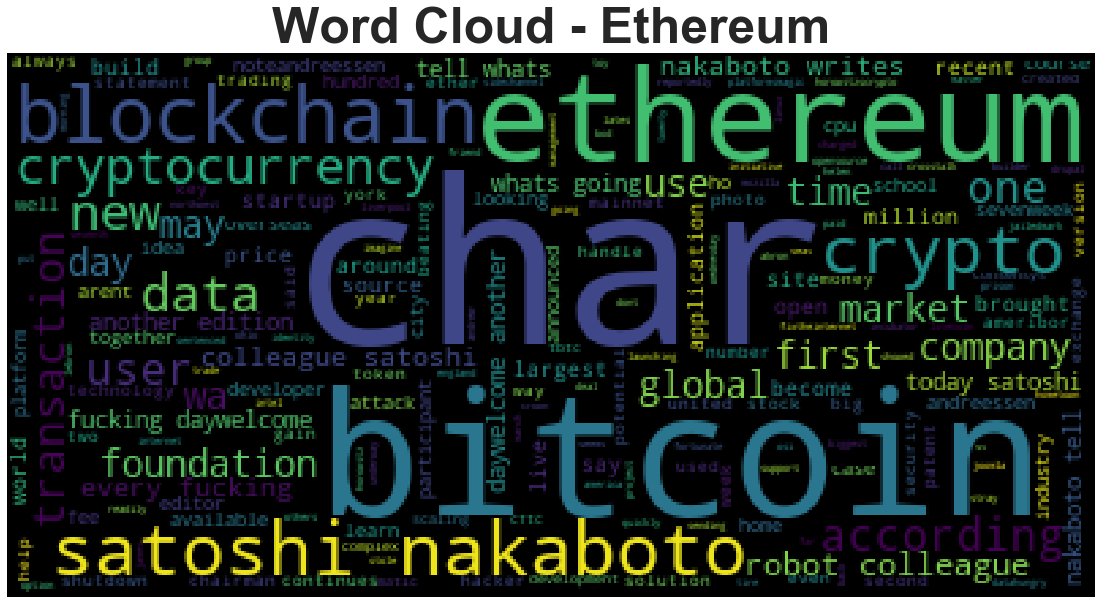

In [75]:
# Generate the Ethereum word cloud
fig = plt.figure()
wc = WordCloud().generate(eth_words)
plt.imshow(wc)
plt.title('Word Cloud - Ethereum', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [76]:
import spacy
from spacy import displacy

In [77]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [78]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [79]:
# Concatenate all of the bitcoin text together
bitcoin_sent = []
for sent in bitcoin_tokens['Text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)
    
one_string_bitcoin = ' '.join(bitcoin_sent)
one_string_bitcoin

'the winklevoss twinsthe brothers mark zuckerberg allegedly stole the idea for facebook fromare making a movie about themselves, deadline reported this week. if that doesnt seem masturbatory enough, r… [+2657 chars] if youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars] reuters\r\n<ul><li>goldman sachs gave five reasons why it thinks bitcoin is "not an asset class" nor "a suitable investment" in a presentation wednesday morning.</li><li>goldman observed that the crypt… [+3412 chars] <ul><li>famed investor michael novogratz tweeted on monday that bitcoin will soon take out the $10,000 resistance level, telling his followers, "get on the train."</li><li>novogratz said that turmoil… [+2757 chars] our robot colleague satoshi nakaboto writes about bitcoin btc every fucking day.\r\nwelcome to another edition of bitcoin today, where i,

In [80]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(one_string_bitcoin)
# Add a title to the document
bitcoin_doc.user_data['title'] = 'Bitcoin NER'

In [81]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [82]:
# List all Entities
for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

mark zuckerberg PERSON
this week DATE
+2657 ORG
goldman sachs ORG
five CARDINAL
bitcoin PERSON
wednesday DATE
goldman ORG
michael novogratz PERSON
monday DATE
bitcoin GPE
$10,000 resistance MONEY
bitcoin GPE
every fucking day DATE
bitcoin GPE
today DATE
bitcoin GPE
satoshi nakaboto PERSON
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
+3041 WORK_OF_ART
2020 DATE
a big year DATE
bitcoin GPE
+6168 WORK_OF_ART
bitcoin GPE
blockchain GPE
bitcoin PERSON
satoshi nakaboto PERSON
bitcoin GPE
every fucking day DATE
bitcoin GPE
today DATE
bitcoin GPE
+3009 PRODUCT
satoshi nakaboto PERSON
bitcoin GPE
every fucking day DATE
bitcoin GPE
today DATE
bitcoin GPE
satoshi nakaboto PERSON
bitcoin GPE
every fucking day DATE
bitcoin GPE
today DATE
bitcoin GPE
satoshi nakaboto PERSON
bitcoin GPE
every fucking day DATE
bitcoin GPE
today DATE
bitcoin GPE
satoshi nakaboto PERSON
bitcoin GPE
every fucking day DATE
bitcoin GPE
today DATE
bitcoin GPE
satoshi nakaboto PERSON
bitcoin GPE
every fucking day DATE
bitc

---

## Ethereum NER

In [83]:
# Concatenate all of the bitcoin text together
eth_sent = []
for sent in ethereum_tokens['Text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)
    
one_string_eth = " ".join(eth_sent)
one_string_eth

'editor’s note:andreessen horowitzscrypto startup school brought together 45 participants from around the u.s. and overseas in a seven-week course to learn how to build crypto companies. andreessen ho… [+3009 chars] our robot colleague satoshi nakaboto writes about bitcoin btc every fucking day.\r\nwelcome to another edition of bitcoin today, where i, satoshi nakaboto, tell you whats been going on with bitcoin in … [+3095 chars] editors note:andreessen horowitzs crypto startup school brought together 45 participants from around the u.s. and overseas in a seven-week course to learn how to build crypto companies. andreessen ho… [+2503 chars] for developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.\r\nmagic, a… [+2450 chars] akron, ohio, the hometown of lebron james and the seat of the us tire industry; the one hundred and twenty seventh largest city in the 

In [84]:
# Run the NER processor on all of the text

# Add a title to the document
eth_doc = nlp(one_string_eth)
eth_doc.user_data['title'] = 'Ethereum NER'

In [85]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [86]:
# List all Entities
for ent in eth_doc.ents:
    print (ent, ent.label_)

andreessen ORG
45 CARDINAL
u.s. GPE
seven-week DATE
andreessen ho… PERSON
+3009 PRODUCT
bitcoin GPE
every fucking day DATE
bitcoin GPE
today DATE
bitcoin GPE
andreessen ORG
crypto startup school ORG
45 CARDINAL
u.s. GPE
seven-week DATE
andreessen ho… PERSON
akron ORG
ohio GPE
lebron james PERSON
us GPE
the one hundred and twenty seventh DATE
us GPE
america GPE
the linux foundation ORG
osi ORG
133 MONEY
$2.5 million MONEY
$2.5 million MONEY
wednesday DATE
morning TIME
march DATE
1500 CARDINAL
well over a hundred CARDINAL
bitcoin GPE
andrews PERSON
st helens GPE
northwest england LOC
liverpool crown c… ORG
+2411 ORG
intel ORG
bits PERSON
satoshi nakaboto PERSON
bitcoin GPE
every fucking day DATE
bitcoin GPE
today DATE
bitcoin GPE
satoshi nakaboto PERSON
bitcoin GPE
every fucking day DATE
bitcoin GPE
today DATE
bitcoin GPE
satoshi nakaboto PERSON
bitcoin GPE
every fucking day DATE
bitcoin GPE
today DATE
bitcoin GPE
blockchain GPE
first ORDINAL
blockchain GPE
goi ORG
bitcoin GPE
blockchain